#### Question 1

1. To calculate the potential for yearly reduction on CO2 emissions, caused by the taxi cabs roaming without passengers. In your calculation please assume that the taxi cab fleet is changing at the rate of 15% per month (from combustion engine-powered vehicles to electric vehicles). Assume also that the average passenger vehicle emits about 404 grams of CO2 per mile.

Assumptions:
   * The question refers that the reduction should be focused on the roaming without passengers, so I will assume we are speaking of tank-to-wheel emissions. For this reason I'll assume that eletric cabs have 0 emissions. 
   * Assume the reduction calculation is for the 537 fleet cabs.
   * I assume that the given time frame is representative of the whole year. A big if, but due to the lack of information is the best aproximation that can be done.
   * Movements between locations are made in a straight line.
   * I assume that we are at the begining of 2020.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy.stats import kurtosis, skew
import os
import sys
import pandas as pd

In [3]:
# setting src folder as a package
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

In [4]:
from d03_processing.q1 import (get_roaming_distance_mean_per_weekday, 
                               get_year_days_df,
                               _select_columns, 
                               _select_vacant, 
                               _add_day, 
                               _add_weekday, 
                               _get_total_roaming_distance_per_day_and_cab,
                               get_internal_combustion_cabs_per_month,
                               get_annual_co2_emissions,
                               _get_roaming_distance_per_weekday_metrics
                              )

# Results

#### Load data

In [5]:
# load final data
file_name = '../data/03_processed/cab_data_wo_outliers_velocity_method.parquet'
cab_data = pd.read_parquet(file_name)

#### Get roaming distance per weekday

In [5]:
roaming_distance_weekday_metrics = get_roaming_distance_mean_per_weekday(cab_data)

2021-01-24 00:29:40,761 - INFO - wrapper - _select_columns took 0:00:00.198999 shape=(11086377, 4) null_values=0)
2021-01-24 00:29:41,454 - INFO - wrapper - _select_vacant took 0:00:00.491516 shape=(6136480, 3) null_values=0)
2021-01-24 00:30:16,767 - INFO - wrapper - _add_day took 0:00:34.804822 shape=(6136480, 4) null_values=0)
2021-01-24 00:30:17,686 - INFO - wrapper - _add_weekday took 0:00:00.517518 shape=(6136480, 5) null_values=0)
2021-01-24 00:30:18,843 - INFO - wrapper - _get_total_roaming_distance_per_day_and_cab took 0:00:01.082805 shape=(11943, 4) null_values=0)
2021-01-24 00:30:18,986 - INFO - wrapper - _get_roaming_distance_per_weekday_metrics took 0:00:00.006962 shape=(7, 5) null_values=0)


#### Emissions year 2020 - no replacement of cabs

In [6]:
# gets year days
year = 2020
year_days_2020 = get_year_days_df(year)

2021-01-24 00:30:18,991 - INFO - wrapper - _year_days took 0:00:00 shape=(366, 1) null_values=0)
2021-01-24 00:30:18,993 - INFO - wrapper - _add_weekday took 0:00:00.001000 shape=(366, 2) null_values=0)
2021-01-24 00:30:18,996 - INFO - wrapper - add_month took 0:00:00.000996 shape=(366, 3) null_values=0)


In [7]:
# cab fleet calculation
params_2020 = {'n_cabs': 537, 'n_months': 12, 'replacing_rate': 0}
internal_combustion_cabs_per_month = get_internal_combustion_cabs_per_month(**params_2020)

In [8]:
# anual emissions
get_annual_co2_emissions(roaming_distance_weekday_metrics, year_days_2020, internal_combustion_cabs_per_month)

2021-01-24 00:30:19,010 - INFO - wrapper - _merge_roaming_distances took 0:00:00.001999 shape=(366, 7) null_values=0)
2021-01-24 00:30:19,014 - INFO - wrapper - _calculate_month_roam_distances took 0:00:00.001998 shape=(12, 5) null_values=0)
2021-01-24 00:30:19,015 - INFO - wrapper - _add_internal_combustion_cabs_per_month took 0:00:00.001000 shape=(12, 6) null_values=0)
2021-01-24 00:30:19,017 - INFO - wrapper - _calculate_total_fleet_roaming_distances_per_month took 0:00:00.000997 shape=(12, 3) null_values=0)


co2_ton              7750.591988
upper_95_co2_ton    13770.748467
lower_95_co2_ton     1730.435510
dtype: float64

#### Emissions year 2020

In [9]:
# gets year days
year = 2020
year_days_2020 = get_year_days_df(year)

2021-01-24 00:30:19,028 - INFO - wrapper - _year_days took 0:00:00.001002 shape=(366, 1) null_values=0)
2021-01-24 00:30:19,030 - INFO - wrapper - _add_weekday took 0:00:00 shape=(366, 2) null_values=0)
2021-01-24 00:30:19,032 - INFO - wrapper - add_month took 0:00:00 shape=(366, 3) null_values=0)


In [10]:
# cab fleet calculation
params_2020 = {'n_cabs': 537, 'n_months': 12, 'replacing_rate': 0.15}
internal_combustion_cabs_per_month = get_internal_combustion_cabs_per_month(**params_2020)

In [11]:
# anual emissions
get_annual_co2_emissions(roaming_distance_weekday_metrics, year_days_2020, internal_combustion_cabs_per_month)

2021-01-24 00:30:19,046 - INFO - wrapper - _merge_roaming_distances took 0:00:00.003002 shape=(366, 7) null_values=0)
2021-01-24 00:30:19,049 - INFO - wrapper - _calculate_month_roam_distances took 0:00:00.001998 shape=(12, 5) null_values=0)
2021-01-24 00:30:19,051 - INFO - wrapper - _add_internal_combustion_cabs_per_month took 0:00:00.001000 shape=(12, 6) null_values=0)
2021-01-24 00:30:19,053 - INFO - wrapper - _calculate_total_fleet_roaming_distances_per_month took 0:00:00.001001 shape=(12, 3) null_values=0)


co2_ton             3658.545392
upper_95_co2_ton    6499.389947
lower_95_co2_ton     817.700836
dtype: float64

#### Emissions year 2021

In [12]:
# gets year days
year = 2021
year_days_2021 = get_year_days_df(year)

2021-01-24 00:30:19,060 - INFO - wrapper - _year_days took 0:00:00 shape=(365, 1) null_values=0)
2021-01-24 00:30:19,062 - INFO - wrapper - _add_weekday took 0:00:00 shape=(365, 2) null_values=0)
2021-01-24 00:30:19,064 - INFO - wrapper - add_month took 0:00:00 shape=(365, 3) null_values=0)


In [13]:
# cab fleet calculation
params_2021 = {'n_cabs': 87, 'n_months': 12, 'replacing_rate': 0.15}
internal_combustion_cabs_per_month_2021 = get_internal_combustion_cabs_per_month(**params_2021)

In [14]:
# anual emissions
get_annual_co2_emissions(roaming_distance_weekday_metrics, year_days_2021, internal_combustion_cabs_per_month_2021)

2021-01-24 00:30:19,078 - INFO - wrapper - _merge_roaming_distances took 0:00:00.001999 shape=(365, 7) null_values=0)
2021-01-24 00:30:19,082 - INFO - wrapper - _calculate_month_roam_distances took 0:00:00.002003 shape=(12, 5) null_values=0)
2021-01-24 00:30:19,083 - INFO - wrapper - _add_internal_combustion_cabs_per_month took 0:00:00.001035 shape=(12, 6) null_values=0)
2021-01-24 00:30:19,086 - INFO - wrapper - _calculate_total_fleet_roaming_distances_per_month took 0:00:00.000998 shape=(12, 3) null_values=0)


co2_ton              571.534599
upper_95_co2_ton    1015.995930
lower_95_co2_ton     127.073269
dtype: float64

#### Emissions year 2022

In [15]:
# gets year days
year = 2022
year_days_2022 = get_year_days_df(year)

2021-01-24 00:30:19,095 - INFO - wrapper - _year_days took 0:00:00 shape=(365, 1) null_values=0)
2021-01-24 00:30:19,097 - INFO - wrapper - _add_weekday took 0:00:00.001002 shape=(365, 2) null_values=0)
2021-01-24 00:30:19,099 - INFO - wrapper - add_month took 0:00:00.001002 shape=(365, 3) null_values=0)


In [16]:
# cab fleet calculation
params_2022 = {'n_cabs': 12, 'n_months': 12, 'replacing_rate': 0.15}
internal_combustion_cabs_per_month_2022 = get_internal_combustion_cabs_per_month(**params_2022)

In [17]:
# anual emissions
get_annual_co2_emissions(roaming_distance_weekday_metrics, year_days_2022, internal_combustion_cabs_per_month_2022)

2021-01-24 00:30:19,112 - INFO - wrapper - _merge_roaming_distances took 0:00:00.003018 shape=(365, 7) null_values=0)
2021-01-24 00:30:19,115 - INFO - wrapper - _calculate_month_roam_distances took 0:00:00.002001 shape=(12, 5) null_values=0)
2021-01-24 00:30:19,117 - INFO - wrapper - _add_internal_combustion_cabs_per_month took 0:00:00.001002 shape=(12, 6) null_values=0)
2021-01-24 00:30:19,119 - INFO - wrapper - _calculate_total_fleet_roaming_distances_per_month took 0:00:00.001001 shape=(12, 3) null_values=0)


co2_ton              60.642930
upper_95_co2_ton    107.846586
lower_95_co2_ton     13.439274
dtype: float64

# Data exploration

#### Evaluate total roaming distances per day

In [6]:
# get total day distance per client and day
total_roaming_distance_per_day_and_cab = (
    cab_data
    .pipe(_select_columns, ['occupancy', 'time', 'cab_id', 'distance'])
    .pipe(_select_vacant)
    .pipe(_add_day)
    .pipe(_add_weekday)
    .pipe(_get_total_roaming_distance_per_day_and_cab)
)

2021-01-24 21:45:47,941 - INFO - wrapper - _select_columns took 0:00:00.175105 shape=(11086377, 4) null_values=0)
2021-01-24 21:45:48,570 - INFO - wrapper - _select_vacant took 0:00:00.443844 shape=(6136480, 3) null_values=0)
2021-01-24 21:46:19,481 - INFO - wrapper - _add_day took 0:00:30.502984 shape=(6136480, 4) null_values=0)
2021-01-24 21:46:20,350 - INFO - wrapper - _add_weekday took 0:00:00.499001 shape=(6136480, 5) null_values=0)
2021-01-24 21:46:21,440 - INFO - wrapper - _get_total_roaming_distance_per_day_and_cab took 0:00:01.008519 shape=(11943, 4) null_values=0)


array([[<AxesSubplot:title={'center':'day_roam_distance'}>]], dtype=object)

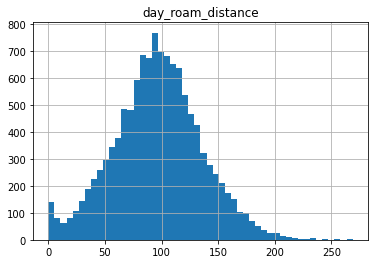

In [19]:
# data is lightly right skewed
total_roaming_distance_per_day_and_cab[['day_roam_distance']].hist(bins=50)

In [20]:
# kurtosis and skewness however, present good values so i'll not perform any treatment
# fun fact is that there are a small peek at the 0 miles
# are there a lot of cab drivers not working or cabs staying in maintenance
kurtosis = kurtosis(total_roaming_distance_per_day_and_cab[['day_roam_distance']])
skewness = skew(total_roaming_distance_per_day_and_cab[['day_roam_distance']])
print(f'kurtosis:{kurtosis} and skewness:{skewness}')

kurtosis:[0.20995863] and skewness:[0.08404303]


#### Evaluation of distance per week day

<AxesSubplot:xlabel='day_roam_distance', ylabel='Count'>

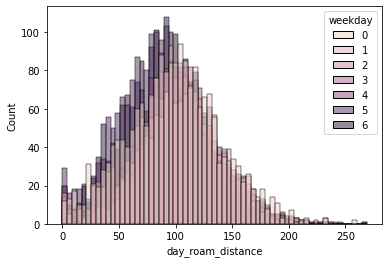

In [21]:
# as expected diferent days of the week present diferent distributions
# seems that at the end of the week (sathurday and sunday) the cabs have a lower distance without passengers
sns.histplot(data=total_roaming_distance_per_day_and_cab, x="day_roam_distance", hue="weekday")

In [22]:
# roaming distances per weekday metrics
distance_roaming_weekday_metrics = _get_roaming_distance_per_weekday_metrics(total_roaming_distance_per_day_and_cab)
distance_roaming_weekday_metrics

2021-01-24 00:30:57,672 - INFO - wrapper - _get_roaming_distance_per_weekday_metrics took 0:00:00.008495 shape=(7, 5) null_values=0)


,weekday,mean_distance,std_distance,upper_95_distance,lower_95_distance
0,0,97.948043,41.758839,181.465720,14.430366
1,1,100.931933,39.393397,179.718727,22.145139
2,2,104.161135,36.462167,177.085469,31.236801
3,3,102.553846,34.932362,172.418571,32.689121
4,4,103.769195,37.601867,178.972928,28.565462
5,5,85.086229,38.219946,161.526121,8.646337
6,6,88.604616,37.078703,162.762021,14.447211


#### Distance per month

In [23]:
# list of days in the year 2020
year = 2020
year_days_w_weekdays = get_year_days_df(year)

2021-01-24 00:30:57,689 - INFO - wrapper - _year_days took 0:00:00 shape=(366, 1) null_values=0)
2021-01-24 00:30:57,692 - INFO - wrapper - _add_weekday took 0:00:00.000994 shape=(366, 2) null_values=0)
2021-01-24 00:30:57,695 - INFO - wrapper - add_month took 0:00:00.001013 shape=(366, 3) null_values=0)


In [24]:
# merges with the distance mean, std, and upper and lower limits
year_days_w_distance = year_days_w_weekdays.merge(distance_roaming_weekday_metrics, left_on='weekday', right_on='weekday', how='left')

In [25]:
# gets roaming distance per month for a single cab
cab_roaming_distance_per_month = year_days_w_distance.groupby('month').sum().drop(columns='weekday')

In [26]:
# number of cabs for each year
params = {'n_cabs': 537, 'n_months': 12, 'replacing_rate': 0.15}
n_cabs_per_month = get_internal_combustion_cabs_per_month(**params)

In [27]:
# adds the number of cabs in the fleet per month
cab_roaming_distance_per_month = cab_roaming_distance_per_month.assign(n_cabs = n_cabs_per_month)

In [28]:
# gets the total fleet roaming distanaces per month
total_roaming_distance_per_month = cab_roaming_distance_per_month[['mean_distance', 'upper_95_distance', 'lower_95_distance']].mul(cab_roaming_distance_per_month['n_cabs'], axis=0)

In [29]:
# total emissions in tons for the cab fleet in a year (assuming fleet replacement)
total_roaming_distance_per_month.sum()*404/1000000

mean_distance        3658.545392
upper_95_distance    6499.389947
lower_95_distance     817.700836
dtype: float64